In [26]:
#importing libraries
import pandas as pd
import geopandas as gpd

In [27]:
#importing calenviroscreen data
ces = pd.read_csv('Data/CES/ces3results.csv')
ces.sample()

,CensusTract,TotalPopulation,CaliforniaCounty,ZIP,NearbyCity_(to help approximate location only),Longitude,Latitude,CES3.0_Score,CES3.0_pctl,CES3.0_pctl_range,...,LinguisticIsolation_pctl,Poverty,Poverty_pctl,Unemployment,Unemployment_pctl,HousingBurden,HousingBurden_pctl,PopChar,PopChar_Score,PopChar_pctl
7507,6073007002,2947,San Diego,92106,San Diego,-117.235636,32.732371,6.34,5.32,5-10%,...,14.88,18.2,22.95,8.8,45.97,9.4,10.75,20.4,2.12,8.61


In [28]:
#we will redefine data type for census tract as a string variable so that it can include 0
ces = pd.read_csv(
        'Data/CES/ces3results.csv',
        dtype={
            'CensusTract':str
        }
)
ces.sample()

,CensusTract,TotalPopulation,CaliforniaCounty,ZIP,NearbyCity_(to help approximate location only),Longitude,Latitude,CES3.0_Score,CES3.0_pctl,CES3.0_pctl_range,...,LinguisticIsolation_pctl,Poverty,Poverty_pctl,Unemployment,Unemployment_pctl,HousingBurden,HousingBurden_pctl,PopChar,PopChar_Score,PopChar_pctl
3971,06095252707,4753,Solano,94533,Fairfield,-122.001175,38.260077,25.01,49.92,45-50%,...,29.29,38.2,57.07,16.7,89.57,23.7,72.81,66.63,6.91,75.23


In [29]:
#narrowing it to LA county
ces = ces.query("CaliforniaCounty=='Los Angeles'")
ces.sample()

,CensusTract,TotalPopulation,CaliforniaCounty,ZIP,NearbyCity_(to help approximate location only),Longitude,Latitude,CES3.0_Score,CES3.0_pctl,CES3.0_pctl_range,...,LinguisticIsolation_pctl,Poverty,Poverty_pctl,Unemployment,Unemployment_pctl,HousingBurden,HousingBurden_pctl,PopChar,PopChar_Score,PopChar_pctl
1241,06037553200,7055,Los Angeles,90706,Bellflower,-118.120561,33.904965,46.08,84.35,80-85%,...,70.59,31.5,47.17,8.9,46.86,21.3,64.39,64.61,6.7,72.12


In [30]:
# now, we will trim our dataset to include variables that we are interested in seeing
ces = ces[['CensusTract','TotalPopulation','Longitude','Latitude','PM2.5','Poverty_pctl']]
ces.columns = ['censustract','totalpop','lon','lat','pm25','poverty_pctl']
ces.sample()

,censustract,totalpop,lon,lat,pm25,poverty_pctl
622,06037402102,4815,-117.746427,34.084449,12.47,64.3


In [31]:
#getting LA census tracts
race = gpd.read_file('Data/census/cr_race_tract.geojson')
race.sample()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
459,14000US06037194401,"Census Tract 1944.01, Los Angeles, CA",2490.0,201.0,2020.0,212.0,1607.0,234.0,172.0,118.0,...,12.0,162.0,118.0,130.0,91.0,75.0,68.0,55.0,57.0,"MULTIPOLYGON (((-118.36696 34.08713, -118.3666..."


In [32]:
#cleaning up census tracts
race = gpd.read_file(
        'Data/census/cr_race_tract.geojson',
        dtype={
            'geoid':str
        }
)
race.sample()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
458,14000US06037194300,"Census Tract 1943, Los Angeles, CA",3303.0,341.0,2964.0,308.0,2695.0,342.0,82.0,121.0,...,12.0,0.0,12.0,50.0,51.0,21.0,31.0,29.0,43.0,"MULTIPOLYGON (((-118.39651 34.09618, -118.3958..."


In [33]:
#cleaning
race['geoid'] = race['geoid'].str.replace('14000US','')
race.sample()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
54,06037106645,"Census Tract 1066.45, Los Angeles, CA",3491.0,389.0,2937.0,316.0,2304.0,310.0,159.0,168.0,...,12.0,114.0,87.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.50276 34.29808, -118.5027..."


In [34]:
#cleaning
race = race[['geoid','B03002003','B03002004','B03002005','B03002006','B03002007','B03002008','B03002009','B03002012']]
race.columns = ['censustract','white','black','ami','asian','nhpi','other','multiracial','latinx']
race.sample()

,censustract,white,black,ami,asian,nhpi,other,multiracial,latinx
219,06037127300,875.0,285.0,35.0,376.0,12.0,93.0,56.0,1999.0


In [35]:
race.tail(5)

,censustract,white,black,ami,asian,nhpi,other,multiracial,latinx
1000,06037980026,8.0,10.0,0.0,0.0,0.0,0.0,6.0,13.0
1001,06037980028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1002,06037980031,399.0,222.0,12.0,40.0,10.0,11.0,56.0,363.0
1003,06037990200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,16000US0644000,1127314.0,340688.0,6091.0,455113.0,5754.0,14051.0,87757.0,1922889.0


In [36]:
race=race.drop(1004)

In [37]:
race.tail()

,censustract,white,black,ami,asian,nhpi,other,multiracial,latinx
999,06037980024,160.0,17.0,11.0,12.0,0.0,0.0,0.0,64.0
1000,06037980026,8.0,10.0,0.0,0.0,0.0,0.0,6.0,13.0
1001,06037980028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1002,06037980031,399.0,222.0,12.0,40.0,10.0,11.0,56.0,363.0
1003,06037990200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#merging datasets
df = ces.merge(race,on="censustract")
df.sample()

,censustract,totalpop,lon,lat,pm25,poverty_pctl,white,black,ami,asian,nhpi,other,multiracial,latinx
167,06037127210,5531,-118.459647,34.206637,11.21,69.93,1108.0,392.0,0.0,506.0,0.0,0.0,54.0,3654.0


In [39]:
#adding usc data to get neighborhood names
usc = pd.read_csv('Data/Censust_neighborhood.csv')
usc.sample()

,GEOID,Tract,CensusTract,Tract Number,Neighborhood,Location,Latitude,Longitude
294,1400000US06037135102,"Census Tract 1351.02, Los Angeles County, Cali...",6037135102,135102,West Hills,"(34.188713, -118.6189975)",34.188713,-118.618998


In [40]:
#cleaning data
usc = pd.read_csv(
        'Data/Censust_neighborhood.csv',
        dtype={
            'CensusTract':str
        }
)
usc.sample()

,GEOID,Tract,CensusTract,Tract Number,Neighborhood,Location,Latitude,Longitude
1325,1400000US06037433403,"Census Tract 4334.03, Los Angeles County, Cali...",06037433403,433403,El Monte,"(34.0624165, -118.025695)",34.062416,-118.025695


In [41]:
usc = usc[['CensusTract','Neighborhood']]
usc.columns = ['censustract','neighborhood']
usc.sample()

,censustract,neighborhood
1108,06037402501,Pomona


In [42]:
#merging
air = usc.merge(df,on='censustract')
air.sample()

,censustract,neighborhood,totalpop,lon,lat,pm25,poverty_pctl,white,black,ami,asian,nhpi,other,multiracial,latinx
585,06037211701,Windsor Square,2827,-118.318453,34.065341,12.89,20.15,772.0,157.0,0.0,1620.0,0.0,0.0,93.0,102.0


In [43]:
#adding a gjson file with neighborhood map
neighborhoods = gpd.read_file('http://s3-us-west-2.amazonaws.com/boundaries.latimes.com/archive/1.0/boundary-set/la-county-neighborhoods-v3.geojson')
neighborhoods.sample()

,kind,external_id,name,slug,set,metadata,resource_uri,geometry
90,L.A. County Neighborhood (V3),sylmar,Sylmar,sylmar-la-county-neighborhood-v3,/1.0/boundary-set/la-county-neighborhoods-v3/,"{'sqmi': 12.4388823041, 'name': 'Sylmar', 'slu...",/1.0/boundary/sylmar-la-county-neighborhood-v3/,"MULTIPOLYGON (((-118.49242 34.33015, -118.4802..."


In [44]:
#cleaning
neighborhoods = neighborhoods[['name','geometry']]
neighborhoods.columns = ['neighborhood','geometry']
neighborhoods.sample()

,neighborhood,geometry
16,Chatsworth,"MULTIPOLYGON (((-118.60862 34.23990, -118.6087..."


In [45]:
#merging
ok = neighborhoods.merge(air,on='neighborhood')
ok.sample()

,neighborhood,geometry,censustract,totalpop,lon,lat,pm25,poverty_pctl,white,black,ami,asian,nhpi,other,multiracial,latinx
937,West Los Angeles,"MULTIPOLYGON (((-118.43421 34.03731, -118.4350...",06037267800,2917,-118.430681,34.03958,12.05,16.39,1850.0,21.0,0.0,507.0,18.0,0.0,81.0,203.0


In [46]:
#imporing libraries
import pandas as pd
import plotly.express as px
from sodapy import Socrata
import numpy as np
import matplotlib.pyplot as plt
import contextily as ctx

In [47]:
# reproject to web mercator
ok = ok.to_crs(epsg=3857)

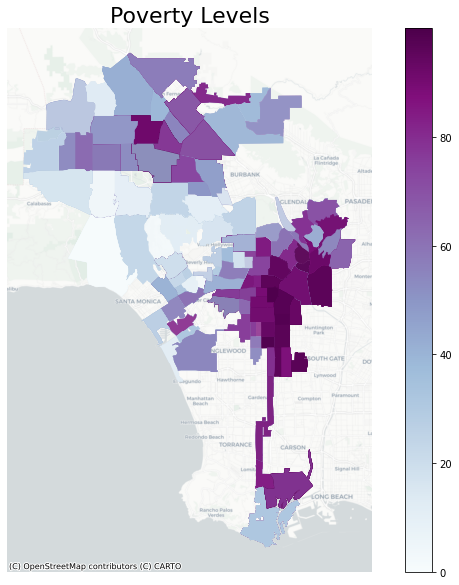

In [48]:
#plotting poverty
ax = ok.plot(figsize=(12,10),
             column='poverty_pctl',
             legend=True,
             alpha=0.8,
             cmap='BuPu')

ax.axis('off')
ax.set_title('Poverty Levels',fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

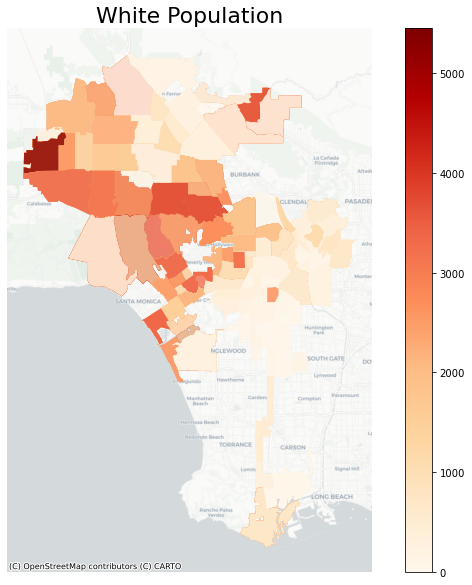

In [49]:
#plotting white pop
ok = ok.to_crs(epsg=3857)
ax1 = ok.plot(figsize=(12,10),
             column='white',
             legend=True,
             alpha=0.8,
             cmap='OrRd')

ax1.axis('off')
ax1.set_title('White Population',fontsize=22)
ctx.add_basemap(ax1,source=ctx.providers.CartoDB.Positron)

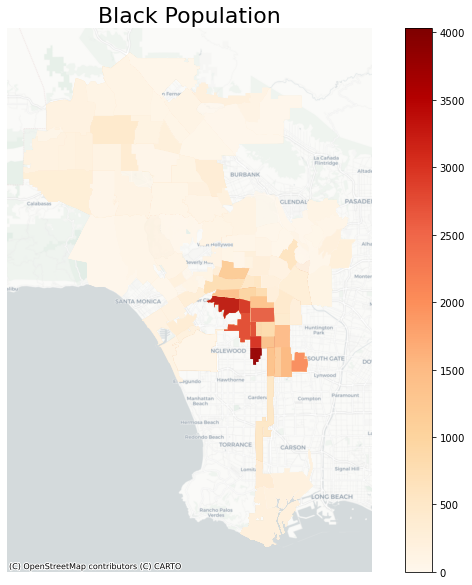

In [50]:
#plotting black pop
ok = ok.to_crs(epsg=3857)
ax2 = ok.plot(figsize=(12,10),
             column='black',
             legend=True,
             alpha=0.8,
             cmap='OrRd')

ax2.axis('off')
ax2.set_title('Black Population',fontsize=22)
ctx.add_basemap(ax2,source=ctx.providers.CartoDB.Positron)

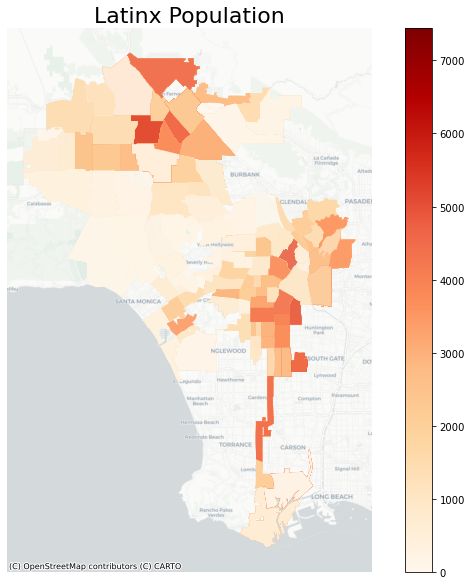

In [51]:
##plotting latinx pop
ok = ok.to_crs(epsg=3857)
ax8 = ok.plot(figsize=(12,10),
             column='latinx',
             legend=True,
             alpha=0.8,
             cmap='OrRd')

ax8.axis('off')
ax8.set_title('Latinx Population',fontsize=22)
ctx.add_basemap(ax8,source=ctx.providers.CartoDB.Positron)